In [1]:
#Q1.2
#simulate 100 days
import numpy as np
simulation=np.random.uniform(low=0,high=1,size=1)
for iteration in range(1,100):
    x=np.random.uniform(low=0,high=1,size=1)
    simulation=np.vstack((simulation,x))
#(0,0.2):1.Movie (0.2,0.6)2.COMP551 (0.6,0.7)3.Playing (0.7,1)4.Studying
for row in range(0,100):
    if simulation[row][0]<0.2:
        simulation[row][0]=1#Movie
    elif simulation[row][0]<0.6:
        simulation[row][0]=2#COMP551
    elif simulation[row][0]<0.7:
        simulation[row][0]=3#PLAYING
    else:
        simulation[row][0]=4#STUDYING
        
#count activities
unique, counts = np.unique(simulation, return_counts=True)
unique=["Movie","COMP551","Playing","Studying"]
result1=dict(zip(unique, counts/100))
print("fractions(100-day simulation):",result1)


fractions(100-day simulation): {'Movie': 0.18, 'COMP551': 0.38, 'Playing': 0.09, 'Studying': 0.35}


In [2]:
#simulate 1000 days
simulation2=np.random.uniform(low=0,high=1,size=1)
for iteration2 in range(1,1000):
    x=np.random.uniform(low=0,high=1,size=1)
    simulation2=np.vstack((simulation2,x))
#(0,0.2):1.Movie (0.2,0.6)2.COMP551 (0.6,0.7)3.Playing (0.7,1)4.Studying
for row in range(0,1000):
    if simulation2[row][0]<0.2:
        simulation2[row][0]=1#Movie
    elif simulation2[row][0]<0.6:
        simulation2[row][0]=2#COMP551
    elif simulation2[row][0]<0.7:
        simulation2[row][0]=3#PLAYING
    else:
        simulation2[row][0]=4#STUDYING
        
#count activities
unique, counts2 = np.unique(simulation2, return_counts=True)
unique=["Movie","COMP551","Playing","Studying"]
result2=dict(zip(unique, counts2/1000))
print("fractions(1000-day simulation):",result2)

fractions(1000-day simulation): {'Movie': 0.201, 'COMP551': 0.388, 'Playing': 0.11, 'Studying': 0.301}


In [3]:
#Q2.1
import csv
import numpy as np
#opening train set
with open('Dataset_1_train.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xs=list()
    ys=list()
    for row in readCSV:
        xs.append(float(row[0]))
        ys.append(float(row[1]))
Xs=np.array(xs)
Y=np.array(ys)
X=Xs**0
for column in range(1,21):
    X=np.column_stack((X,Xs**column))
    
#compute W
result=np.matmul(X.T,X)
result=np.linalg.inv(result)
result=np.matmul(result,X.T)
result=np.matmul(result,Y)
w=result
#a MSE
def MSE(w,X,Y):
    return np.matmul((Y-np.matmul(X,w)).T,Y-np.matmul(X,w))/len(X)

TrainMSE=MSE(w,X,Y)

#load validate set
with open('Dataset_1_valid.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xv=list()
    yv=list()
    for row in readCSV:
        type(row[0])
        xv.append(float(row[0]))
        yv.append(float(row[1]))
xValid=np.array(xv)
yValid=np.array(yv)
XV=xValid**0
for column in range(1,21):
    XV=np.column_stack((XV,xValid**column))
xValid=XV
ValidMSE=MSE(w,XV,yValid)
print("Train MSE:",TrainMSE)
print("Validation MSE:",ValidMSE)
w=np.flip(w,0)
#(b)plotting
import matplotlib.pyplot as plt
plt.plot(xs,ys,'bo',label='observation')
plt.plot(xv,yv,'go',label='validation')
xp=np.linspace(-1,1,50)
plt.plot(xp,np.polyval(w,xp),'r-',label='fitting line')
plt.ylim(-50,40)
plt.legend(loc='best')
plt.show()


Train MSE: 6.474690849607278
Validation MSE: 1420.5567393797228


<Figure size 640x480 with 1 Axes>

Text(0,0.5,'MSE')

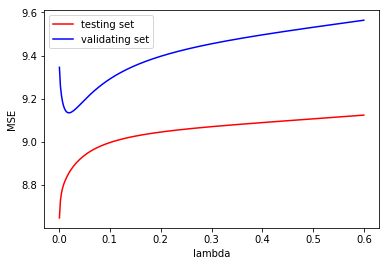

In [4]:
#2.2 (a)
I=np.identity(21)
def L2MSE(LAMB,Xset,Yset):
    temp=np.matmul(Xset.T,Xset)+LAMB*I
    temp=np.linalg.inv(temp)
    temp=np.matmul(temp,Xset.T)
    temp=np.matmul(temp,Yset)
    return temp
t1=np.arange(0.001, 0.6, 0.002)
v1=list()
v2=list()
for i in t1:
    v1.append(MSE(L2MSE(i,X,Y),X,Y))
    v2.append(MSE(L2MSE(i,X,Y),xValid,yValid))

import matplotlib.pyplot as plt
plt.plot(t1,v1,'r-',label="testing set")
plt.plot(t1,v2,'b-',label="validating set")
plt.legend(loc='best')
plt.xlabel('lambda')
plt.ylabel('MSE')

best lambda: 0.010160684585571289
corresponding MSE 9.13508362417155


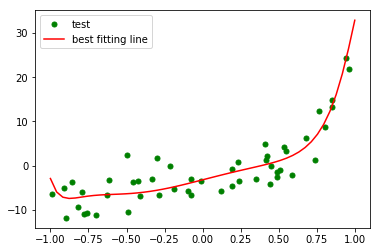

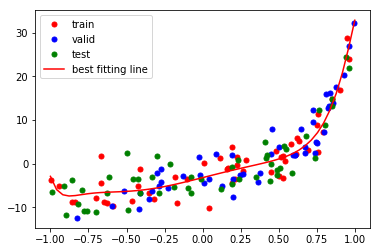

In [5]:

def Objective_Function(lamb):
    return MSE(L2MSE(lamb,X,Y),xValid,yValid)

from scipy.optimize import minimize
guess=0.5
sol=minimize(Objective_Function,guess,method='SLSQP')
bestLamb=sol['jac'][0]
smallestVMSE=sol['fun']

print('best lambda:',bestLamb)
print('corresponding MSE',smallestVMSE)
#load test set
with open('Dataset_1_test.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xt=list()
    yt=list()
    for row in readCSV:
        type(row[0])
        xt.append(float(row[0]))
        yt.append(float(row[1]))
xTest=np.array(xt)
yTest=np.array(yt)
XT=xTest**0
for column in range(1,21):
    XT=np.column_stack((XT,xTest**column))
xTest=XT
optimalW=np.flip(L2MSE(bestLamb,X,Y),0)
TestMSE=MSE(optimalW,xTest,yTest)

#ploting test data
plt.plot(xt,yt,'go',label='test',markersize=5)
xp=np.linspace(-1,1,50)
plt.plot(xp,np.polyval(optimalW,xp),'r-',label='best fitting line')
plt.legend(loc='best')
plt.show()
#all together
plt.plot(xs,ys,'ro',label='train',markersize=5)
plt.plot(xv,yv,'bo',label='valid',markersize=5)
plt.plot(xt,yt,'go',label='test',markersize=5)
xp=np.linspace(-1,1,50)
plt.plot(xp,np.polyval(optimalW,xp),'r-',label='best fitting line')
plt.legend(loc='best')


In [6]:
#Q3
#3.1.a
import csv
import numpy as np
with open('Dataset_2_train.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xs=list()
    ys=list()
    for row in readCSV:
        xs.append(float(row[0]))
        ys.append(float(row[1]))
X=np.array(xs)
Y=np.array(ys)
trainingSet=np.column_stack((X,Y))
with open('Dataset_2_valid.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xvs=list()
    yvs=list()
    for row in readCSV:
        xvs.append(float(row[0]))
        yvs.append(float(row[1]))
XV=np.array(xvs)
YV=np.array(yvs)
validationSet=np.column_stack((XV,YV))
with open('Dataset_2_test.csv','r') as csv_file:
    readCSV= csv.reader(csv_file, delimiter=',')
    xts=list()
    yts=list()
    for row in readCSV:
        xts.append(float(row[0]))
        yts.append(float(row[1]))
XT=np.array(xts)
YT=np.array(yts)
testSet=np.column_stack((XT,YT))

def Error(w,datapoint):
    estimate=w[0]+datapoint[0]*w[1]
    error=estimate-datapoint[1]
    return error



def SGD(dataset,dataset2,model,stepsize,iteration):
    change=10
    i=0
    validMSECollection=np.array([0])
    trainMSECollection=np.array([0])
    radiusOfConvergence=1e-5
    while i<iteration:
        trainMSE=0
        validMSE=0
        i=i+1
        np.random.shuffle(dataset)
        for datapoint in dataset:
            error=Error(model,datapoint)
            #update simultaneously
            model[0]=model[0]-error*stepsize
            model[1]=model[1]-error*stepsize*datapoint[0]
            trainMSE=trainMSE+error**2
        trainMSE=trainMSE/len(dataset)
        trainMSECollection=np.append(trainMSECollection,trainMSE)
        for datapoint in dataset2:
            error=Error(model,datapoint)
            validMSE=validMSE+error**2
        validMSE=validMSE/len(dataset2)
        validMSECollection=np.append(validMSECollection,validMSE)
    result= {}
    result['TrainMSE']= trainMSECollection
    result['ValidMSE']= validMSECollection
    result['TMSE']=trainMSE
    result['VMSE']=validMSE
    result['Model']=model
    result['iteration']=i
    return result
coeff=[1,1]
result=SGD(trainingSet,validationSet,coeff,1e-6,100000)
print(result)

{'TrainMSE': array([ 0.        , 28.2015828 , 28.17375488, ...,  0.09564702,
        0.09564701,  0.095647  ]), 'ValidMSE': array([ 0.        , 28.05210269, 28.02452983, ...,  0.07516782,
        0.07516778,  0.07516774]), 'TMSE': 0.09564700271313806, 'VMSE': 0.07516773704965735, 'Model': [3.600164320088493, 4.292640821632016], 'iteration': 100000}


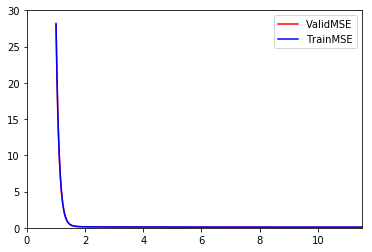

In [7]:
#3.1.b ploting
iteration=result['iteration']
VMSE=result['ValidMSE']
VMSE=np.delete(VMSE,0)
np.savetxt("Assignment1_260631276_3_1_a.txt", VMSE, delimiter=",")
VMSE[iteration-1]
TMSE=result['TrainMSE']
TMSE=np.delete(TMSE,0)
TMSE[iteration-1]
import math 
import matplotlib.pyplot as plt
xaxis=np.linspace(1,math.log(iteration),iteration)
plt.plot(xaxis,VMSE.T,'r-', label='ValidMSE',markersize=1)
plt.plot(xaxis,TMSE.T,'b-', label='TrainMSE',markersize=1)
plt.axis([0, math.log(iteration), 0, 30])
plt.xlabel=("log iteration")
plt.ylabel=("MSE")
plt.legend()
plt.show()

In [8]:
#3.2.try different step size
iteration=1e4
stepsize1=1e-1
stepsize2=1e-2
stepsize3=1e-3
stepsize4=1e-4
stepsize5=1e-5
stepsize6=1e-6
stepsize7=1e-7

In [9]:
coeff=[0,0]
result1=SGD(trainingSet,validationSet,coeff,stepsize1,iteration)

print(result1)



{'TrainMSE': array([0.        , 0.70133095, 0.10682351, ..., 0.10598385, 0.10363495,
       0.10410572]), 'ValidMSE': array([0.        , 0.07309694, 0.07407532, ..., 0.07459635, 0.07431605,
       0.07589222]), 'TMSE': 0.1041057215758903, 'VMSE': 0.07589222278437198, 'Model': [3.6050348612315584, 4.371001879238264], 'iteration': 10000}


In [10]:
coeff=[0,0]
result2=SGD(trainingSet,validationSet,coeff,stepsize2,iteration)
print(result2)

{'TrainMSE': array([0.        , 5.33449468, 0.14169725, ..., 0.09695224, 0.09658819,
       0.09657572]), 'ValidMSE': array([0.        , 0.16769791, 0.1261877 , ..., 0.07464016, 0.07613642,
       0.07379382]), 'TMSE': 0.09657572332284138, 'VMSE': 0.07379381956253882, 'Model': [3.5927193914150517, 4.335725951362039], 'iteration': 10000}


In [11]:
coeff=[0,0]
result3=SGD(trainingSet,validationSet,coeff,stepsize3,iteration)
print(result3)



{'TrainMSE': array([ 0.        , 32.29030716, 12.07586823, ...,  0.09566635,
        0.095666  ,  0.09566778]), 'ValidMSE': array([ 0.        , 18.84514327,  7.14417792, ...,  0.07403837,
        0.07405693,  0.07406884]), 'TMSE': 0.09566777970027915, 'VMSE': 0.07406883753939271, 'Model': [3.576492763288868, 4.320316217041708], 'iteration': 10000}


In [12]:
coeff=[0,0]
result4=SGD(trainingSet,validationSet,coeff,stepsize4,iteration)
print(result4)

{'TrainMSE': array([ 0.        , 48.3194061 , 43.76852709, ...,  0.09552433,
        0.09552433,  0.09552419]), 'ValidMSE': array([ 0.        , 45.66688394, 41.37972778, ...,  0.07407085,
        0.07407146,  0.07407054]), 'TMSE': 0.09552419112106682, 'VMSE': 0.07407053890822464, 'Model': [3.5765169293412966, 4.320272992825811], 'iteration': 10000}


In [13]:
coeff=[0,0]
result5=SGD(trainingSet,validationSet,coeff,stepsize5,iteration)
print(result5)


{'TrainMSE': array([ 0.        , 50.48962332, 49.99252603, ...,  0.09568702,
        0.09568691,  0.0956868 ]), 'ValidMSE': array([ 0.        , 49.90648439, 49.4165781 , ...,  0.07533545,
        0.07533498,  0.07533451]), 'TMSE': 0.09568679601991577, 'VMSE': 0.0753345104781111, 'Model': [3.603223983503278, 4.289065099144785], 'iteration': 10000}


In [14]:
coeff=[0,0]
result6=SGD(trainingSet,validationSet,coeff,stepsize6,iteration)
print(result6)


{'TrainMSE': array([ 0.        , 50.7137788 , 50.66362459, ...,  0.14926291,
        0.14925723,  0.14925156]), 'ValidMSE': array([ 0.        , 50.35157849, 50.30192793, ...,  0.15872624,
        0.15871846,  0.15871067]), 'TMSE': 0.14925155777808716, 'VMSE': 0.1587106745675827, 'Model': [4.001622578764162, 3.7641195420798845], 'iteration': 10000}


In [15]:
coeff=[0,0]
result7=SGD(trainingSet,validationSet,coeff,stepsize7,iteration)
print(result7)


{'TrainMSE': array([ 0.        , 50.73626737, 50.73124748, ..., 18.91465791,
       18.9127975 , 18.91093727]), 'ValidMSE': array([ 0.        , 50.39630614, 50.39133444, ..., 18.86063621,
       18.85879063, 18.85694523]), 'TMSE': 18.91093726736791, 'VMSE': 18.856945226547595, 'Model': [1.6241033009323202, 1.4285956270001468], 'iteration': 10000}


In [16]:
ValidMSE={'1':result1['VMSE'],'2':result2['VMSE'],'3':result3['VMSE'],'4':result4['VMSE'],'5':result5['VMSE'],'6':result6['VMSE'],'7':result7['VMSE']}
print(ValidMSE)


{'1': 0.07589222278437198, '2': 0.07379381956253882, '3': 0.07406883753939271, '4': 0.07407053890822464, '5': 0.0753345104781111, '6': 0.1587106745675827, '7': 18.856945226547595}


In [17]:
iteration=1e3
coeff=[0,0]
result2=SGD(trainingSet,validationSet,coeff,stepsize2,iteration)
coeff=[0,0]
result3=SGD(trainingSet,validationSet,coeff,stepsize3,iteration)
coeff=[0,0]
result4=SGD(trainingSet,validationSet,coeff,stepsize4,iteration)
coeff=[0,0]
result5=SGD(trainingSet,validationSet,coeff,stepsize5,iteration)
ValidMSE={'2':result2['VMSE'],'3':result3['VMSE'],'4':result4['VMSE'],'5':result5['VMSE']}
print(ValidMSE)


{'2': 0.07413151126158796, '3': 0.07404995563154312, '4': 0.0753351999048462, '5': 0.1587085502714316}


In [18]:
iteration=1e2
coeff=[0,0]
result2=SGD(trainingSet,validationSet,coeff,stepsize2,iteration)
coeff=[0,0]
result3=SGD(trainingSet,validationSet,coeff,stepsize3,iteration)
coeff=[0,0]
result4=SGD(trainingSet,validationSet,coeff,stepsize4,iteration)
ValidMSE={'2':result2['VMSE'],'3':result3['VMSE'],'4':result4['VMSE']}
print(ValidMSE)

{'2': 0.07507806366570699, '3': 0.07537862675155295, '4': 0.1586698287584694}


In [19]:
iteration=50
coeff=[0,0]
result2=SGD(trainingSet,validationSet,coeff,stepsize2,iteration)
coeff=[0,0]
result3=SGD(trainingSet,validationSet,coeff,stepsize3,iteration)
coeff=[0,0]
print(ValidMSE)

{'2': 0.07507806366570699, '3': 0.07537862675155295, '4': 0.1586698287584694}


In [20]:
iteration=1e4
stepsize=stepsize2
testMSE=0
coeff=[0,0]
bestResult=SGD(trainingSet,validationSet,coeff,stepsize,iteration)
w=bestResult['Model']
for datapoint in testSet:
    error=Error(w,datapoint)
    testMSE=testMSE+error**2
testMSE=testMSE/len(testSet)
print(testMSE)

0.06979214820917252


In [21]:
#3.3
import random 
epoch=[random.randint(1,50),random.randint(1,50),random.randint(1,50),random.randint(1,50)]
epoch=[1,15,20,37,40]
print(epoch)

[1, 15, 20, 37, 40]


In [22]:
stepsize=stepsize2
coeff=[0,0]
temp1=SGD(trainingSet,validationSet,coeff,stepsize,1)
coeff=[0,0]
temp2=SGD(trainingSet,validationSet,coeff,stepsize,15)
coeff=[0,0]
temp3=SGD(trainingSet,validationSet,coeff,stepsize,20)
coeff=[0,0]
temp4=SGD(trainingSet,validationSet,coeff,stepsize,37)
coeff=[0,0]
temp5=SGD(trainingSet,validationSet,coeff,stepsize,40)

model1=temp1['Model']
model2=temp2['Model']
model3=temp3['Model']
model4=temp4['Model']
model5=temp5['Model']
print(model1)

[4.035277061875921, 3.727827849491529]


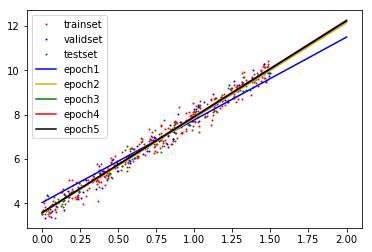

In [23]:
xp=np.linspace(0,2,50)
def getValue(model,x):
    return model[0]+model[1]*x
plt.plot(xs,ys,'ro',markersize=1,label='trainset')
plt.plot(xvs,yvs,'bo',markersize=1,label='validset')
plt.plot(xts,yts,'go',markersize=1,label='testset')
plt.plot(xp,getValue(model1,xp),'b-',label="epoch1")
plt.plot(xp,getValue(model2,xp),'y-',label="epoch2")
plt.plot(xp,getValue(model3,xp),'g-',label="epoch3")
plt.plot(xp,getValue(model4,xp),'r-',label="epoch4")
plt.plot(xp,getValue(model5,xp),color="black",label="epoch5")
plt.legend(loc='best')
plt.show()

In [24]:
#4.1.a
import pandas as pd
import numpy as np
nan=np.nan
CAC=pd.read_csv('Q4.csv',header='infer')
CAC=CAC.replace('?',nan)
cityName=CAC.pop('Column4')
missingPoint=CAC.isnull().sum()
CAC=CAC.replace(nan,0)
CAC=CAC.convert_objects(convert_numeric=True)
colSum=CAC.sum()
sampleMean=colSum/(len(CAC)-missingPoint)
header=list(CAC)
i=0
def fillWithMean(data):
    i=0
    for feat in header:
        fill=sampleMean[i]
        data[feat]=data[feat].replace(0,fill)
        i=i+1
fillWithMean(CAC)
CAC.to_csv('Assignment1_260631276_4_1_d.csv')
state=CAC.pop('Column1')
country=CAC.pop('Column2')
community=CAC.pop('Column3')
fold=CAC.pop('Column5')
y=CAC['Column128']





F:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


In [25]:
temp=CAC
#4.2 
#split test sets
Test_set1=CAC.sample(frac=0.2,random_state=200)
CAC=CAC.drop(Test_set1.index)
Test_set2=CAC.sample(frac=0.25,random_state=200)
CAC=CAC.drop(Test_set2.index)
Test_set3=CAC.sample(frac=(200/600),random_state=200)
CAC=CAC.drop(Test_set3.index)
Test_set4=CAC.sample(frac=0.5,random_state=200)
Test_set5=CAC.drop(Test_set4.index)

Train_set1=temp.drop(Test_set1.index)
Train_set2=temp.drop(Test_set2.index)
Train_set3=temp.drop(Test_set3.index)
Train_set4=temp.drop(Test_set4.index)
Train_set5=temp.drop(Test_set5.index)

Test_set1.to_csv('CandC-test1.csv',header=False,index=False)
Train_set1.to_csv('CandC-train1.csv',header=False,index=False)

Test_set2.to_csv('CandC-test2.csv',header=False,index=False)
Train_set2.to_csv('CandC-train2.csv',header=False,index=False)

Test_set3.to_csv('CandC-test3.csv',header=False,index=False)
Train_set3.to_csv('CandC-train3.csv',header=False,index=False)

Test_set4.to_csv('CandC-test4.csv',header=False,index=False)
Train_set4.to_csv('CandC-train4.csv',header=False,index=False)

Test_set5.to_csv('CandC-test5.csv',header=False,index=False)
Train_set5.to_csv('CandC-train5.csv',header=False,index=False)

Test_set1=Test_set1.values
Train_set1=Train_set1.values

Test_set2=Test_set2.values
Train_set2=Train_set2.values

Test_set3=Test_set3.values
Train_set3=Train_set3.values


Test_set4=Test_set4.values
Train_set4=Train_set4.values

Test_set5=Test_set5.values
Train_set5=Train_set5.values

def Error(model,datapoint):
    result=model[0]
    for feat in range(0,len(datapoint)-1):
        temp=model[feat+1]*datapoint[feat]
        result=result+temp
    return result-datapoint[len(datapoint)-1]


def LS(dataset,LAMB):
    temp=dataset.T
    I=np.identity(len(temp))
    Yset=temp[len(temp)-1]
    Xset=np.delete(temp,len(temp)-1,0)
    padding=np.empty(len(Xset.T))
    padding.fill(1)
    padding=padding.T
    Xset=np.row_stack((padding,Xset))
    Xset=Xset.T
    temp=np.matmul(Xset.T,Xset)+LAMB*I
    temp=np.linalg.inv(temp)
    temp=np.matmul(temp,Xset.T)
    temp=np.matmul(temp,Yset)
    return temp

result1=LS(Train_set1,0)
result2=LS(Train_set2,0) 
result3=LS(Train_set3,0)
result4=LS(Train_set4,0) 
result5=LS(Train_set5,0)
result=(result1+result2+result3+result4+result5)/5

def MSE(dataset,w):
    MSE=0
    for datapoint in dataset:
        error=Error(w,datapoint)
        MSE=MSE+error**2
    MSE=MSE/len(dataset)
    return MSE

mseCollect=list()
mseCollect.append(MSE(Test_set1,result1))
mseCollect.append(MSE(Test_set2,result2))
mseCollect.append(MSE(Test_set3,result3))
mseCollect.append(MSE(Test_set4,result4))
mseCollect.append(MSE(Test_set5,result5))
mseCollect=np.array(mseCollect)
averageMSE=np.mean(mseCollect)



In [26]:
#write

doc={'averageMSE':averageMSE,'model':result}

f = open("Assignment1_260631276_4_2.txt","w")
f.write(str(doc))
f.close()



In [27]:
#4.3
def L2TrainMSE(trainset,testset,LAMB):
    mse=0
    model=LS(trainset,LAMB)
    mse=MSE(trainset,model)
    return mse
def L2TMSE(trainset,testset,LAMB):
    mse=0
    model=LS(trainset,LAMB)
    mse=MSE(testset,model)
    return mse
def AvgTrainMse(LAMB):
    temp=0
    temp=temp+L2TrainMSE(Train_set1,Test_set1,LAMB)
    temp=temp+L2TrainMSE(Train_set2,Test_set2,LAMB)
    temp=temp+L2TrainMSE(Train_set3,Test_set3,LAMB)
    temp=temp+L2TrainMSE(Train_set4,Test_set4,LAMB)
    temp=temp+L2TrainMSE(Train_set5,Test_set5,LAMB)
    return temp/5
def AvgMse(LAMB):
    temp=0
    temp=temp+L2TMSE(Train_set1,Test_set1,LAMB)
    temp=temp+L2TMSE(Train_set2,Test_set2,LAMB)
    temp=temp+L2TMSE(Train_set3,Test_set3,LAMB)
    temp=temp+L2TMSE(Train_set4,Test_set4,LAMB)
    temp=temp+L2TMSE(Train_set5,Test_set5,LAMB)
    return temp/5
import matplotlib.pyplot as plt
LAMB=np.linspace(0,1,5)#0,0.25,0.5,0.75,1
avMse=list()
j=0
for i in LAMB:
    j=j+1
    result1=LS(Train_set1,i)
    result2=LS(Train_set2,i) 
    result3=LS(Train_set3,i)
    result4=LS(Train_set4,i) 
    result5=LS(Train_set5,i)
    result=(result1+result2+result3+result4+result5)/5
    doc={'lambda':i,'average MSE':AvgMse(i),'coeff1':result}
    filename='Assignment1_260631276_4_3.txt'
    f = open(filename,"a+")
    f.write(str(doc))
    f.close()   
    avMse.append(AvgMse(i))

In [28]:
#plot

LAMB=np.linspace(0,1,50)
plotingMSE1=list()
plotingMSE2=list()
dic={}
for i in LAMB:
    dic[i]=AvgMse(i)+AvgTrainMse(i)
    plotingMSE1.append(AvgTrainMse(i))
    plotingMSE2.append(AvgMse(i))



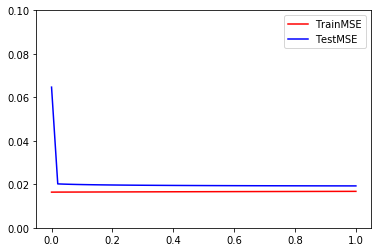

0.7142857142857142
0.03601346392210256


In [29]:
plt.plot(LAMB,plotingMSE1,'r-',label='TrainMSE')
plt.plot(LAMB,plotingMSE2,'b-',label='TestMSE')
plt.ylabel=("MSE")
plt.xlabel=("lambda")
plt.legend(loc='best')
plt.ylim(0,0.1)
plt.show()
minkey=min(dic, key=dic.get)
minMSE=dic[minkey]
print(minkey)
print(minMSE)